Exploratory Data Analysis (EDA) and Business Insights

Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Customers Dataset Summary:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  20

<ipython-input-3-a5b9f3b98e9c>:52: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = transactions.set_index('TransactionDate').resample('M')['TotalValue'].sum()


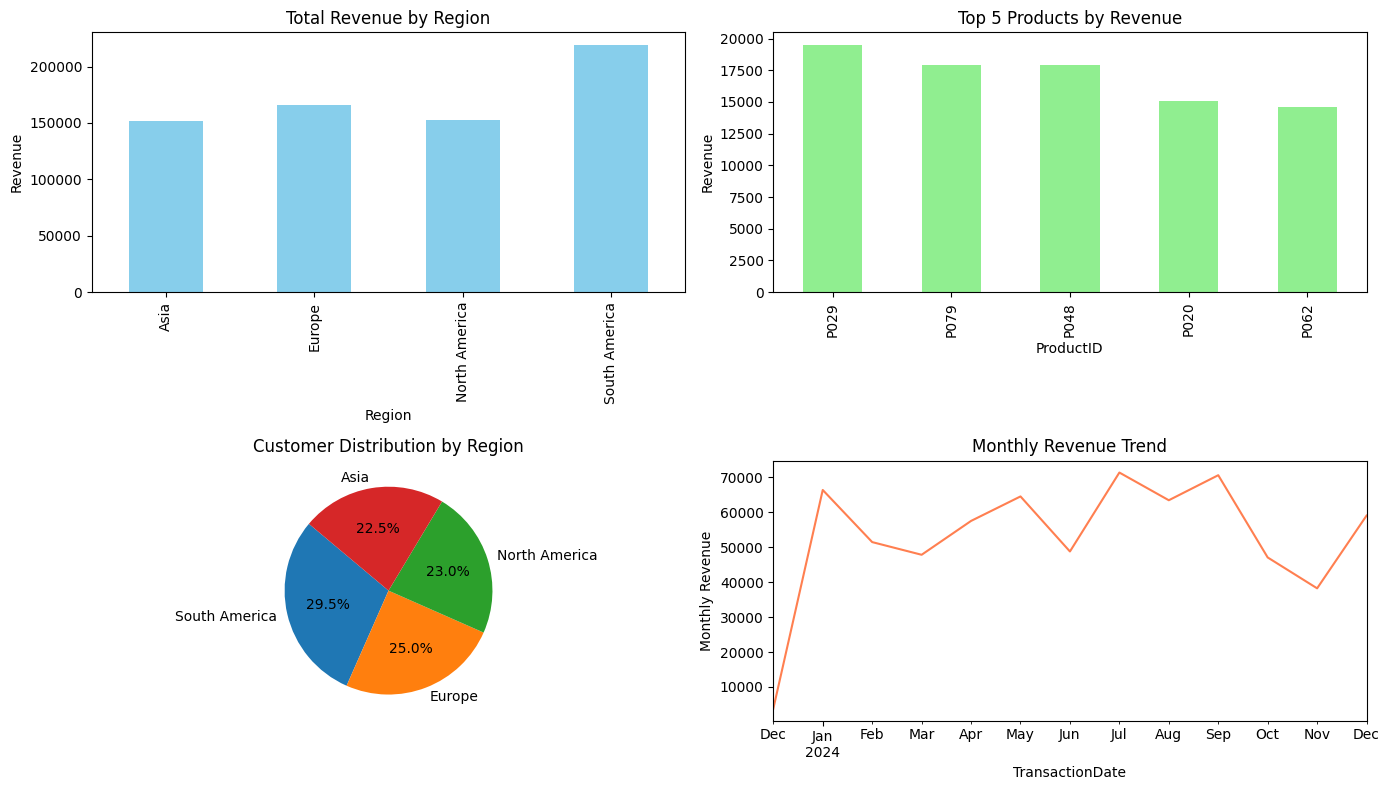


Insights saved to 'Business_Insights.txt'


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Convert date columns to datetime for analysis
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Step 1: Data Cleaning and Preparation
print("Missing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Step 2: Summary Statistics
print("\nCustomers Dataset Summary:")
print(customers.describe(include='all'))

print("\nProducts Dataset Summary:")
print(products.describe(include='all'))

print("\nTransactions Dataset Summary:")
print(transactions.describe(include='all'))

# Step 3: Total Revenue Analysis
total_revenue = transactions['TotalValue'].sum()
print(f"\nTotal Revenue Generated: ${total_revenue:.2f}")

# Step 4: Top 5 Products by Revenue
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Revenue:")
print(top_products)

# Step 5: Regional Revenue Distribution
transactions_with_region = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')
region_sales = transactions_with_region.groupby('Region')['TotalValue'].sum()
print("\nRegional Revenue Distribution:")
print(region_sales)

# Step 6: Customer Distribution by Region
customer_region_distribution = customers['Region'].value_counts()
print("\nCustomer Distribution by Region:")
print(customer_region_distribution)

# Step 7: Monthly Revenue Trend
monthly_revenue = transactions.set_index('TransactionDate').resample('M')['TotalValue'].sum()

# Step 8: Visualizations
plt.figure(figsize=(14, 8))

# Revenue by region
plt.subplot(2, 2, 1)
region_sales.plot(kind='bar', color='skyblue', title='Total Revenue by Region')
plt.ylabel('Revenue')

# Top 5 products by revenue
plt.subplot(2, 2, 2)
top_products.plot(kind='bar', color='lightgreen', title='Top 5 Products by Revenue')
plt.ylabel('Revenue')

# Customer distribution by region
plt.subplot(2, 2, 3)
customer_region_distribution.plot(kind='pie', autopct='%1.1f%%', title='Customer Distribution by Region', startangle=140)
plt.ylabel('')

# Monthly revenue trend
plt.subplot(2, 2, 4)
monthly_revenue.plot(title='Monthly Revenue Trend', color='coral')
plt.ylabel('Monthly Revenue')

plt.tight_layout()
plt.show()

# Save Results
# Save the insights as a text file
insights = f"""
Business Insights:
1. Total Revenue Generated: ${total_revenue:.2f}

2. Top 5 Products by Revenue:
{top_products.to_string()}

3. Regional Revenue Distribution:
{region_sales.to_string()}

4. Customer Distribution by Region:
{customer_region_distribution.to_string()}

5. Monthly Revenue Trend:
The monthly revenue shows seasonal peaks in specific months, indicating high sales periods.
"""

with open("Business_Insights.txt", "w") as f:
    f.write(insights)

print("\nInsights saved to 'Business_Insights.txt'")
